In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/JPvideos.csv


In [2]:
data = pd.read_csv("/kaggle/input/youtube-new/GBvideos.csv")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


### Scratch ile DF oluşturma

In [3]:
#veri listeleri hazırlanır
title = ["Reamonn - Supergirl", "Eagles - Hotel California"]
views = ["12020","52874"]

#label ve col değerleri listeye eklenir
list_label=["title","views"]
list_colm =[title,views]

# convert zip
df_zip = list(zip(list_label,list_colm))

# convert dict
df_dict = dict(df_zip)

#convert df
df=pd.DataFrame(df_dict)
df

,title,views
0,Reamonn - Supergirl,12020
1,Eagles - Hotel California,52874


In [4]:
# yeni column ekleme
df["likes"]=["12000","35698"]
df

,title,views,likes
0,Reamonn - Supergirl,12020,12000
1,Eagles - Hotel California,52874,35698


In [5]:
# broadcasting : yeni column ekleme ve tüm elemanlara aynı değeri atama
df["dislikes"]=0
df

,title,views,likes,dislikes
0,Reamonn - Supergirl,12020,12000,0
1,Eagles - Hotel California,52874,35698,0


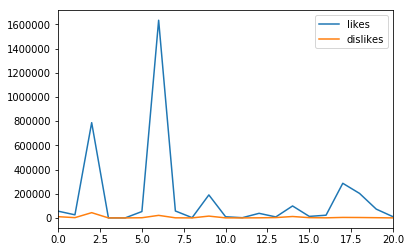

In [6]:
# Visual Exploratory Data Analysis

# Plot

data_nw = data.loc[:20,["likes","dislikes"]]
data_nw.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c72f86d68>,
      dtype=object)

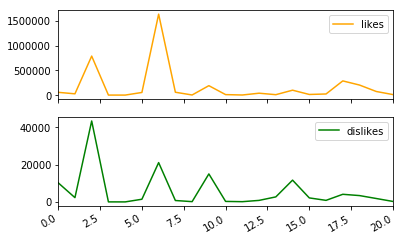

In [7]:
# Subplot

data_nw.plot(subplots=True, color=["orange","green"])

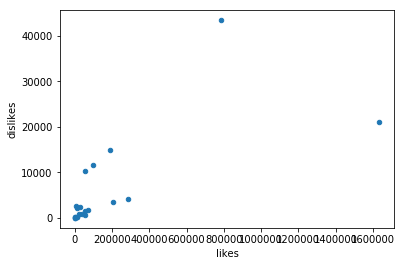

In [8]:
# Scatter

data_nw.plot(kind="scatter",x="likes",y="dislikes")
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


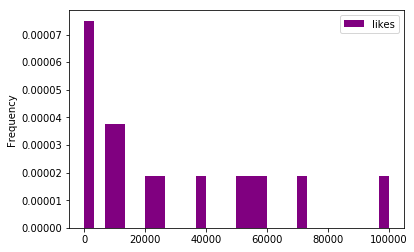

In [9]:
# Histogram

data_nw.plot(kind="hist", y="likes", bins=30, color="purple", range=(0,100000), normed=True )

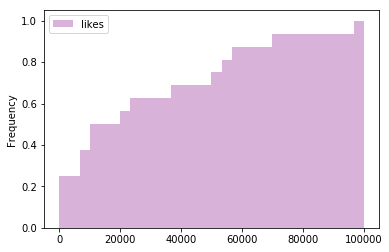

In [10]:
# Histogram Cumulative

data_nw.plot(kind="hist", y="likes", bins=30, color="purple", alpha=.3, range=(0,100000), normed=True, cumulative=True )

In [11]:
# Statistical Exploratory Data Analysis

data.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [12]:
# Indexing Pandas Time Series

time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1]))

<class 'str'>


In [14]:
# convert to date time object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [15]:
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]

datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
data2= data2.set_index("date")
data2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
date,,,,,,,,,,,,,,,,
1992-01-10,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1992-02-10,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
1992-03-10,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1993-03-15,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
1993-03-16,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [17]:
# index date time old göre date time'a göre verileri çekebiliriz
print(data2.loc["1993-03-16"])

video_id                                                        rHwDegptbI4
trending_date                                                      17.14.11
title                     Dashcam captures truck's near miss with child ...
channel_title                                              Cute Girl Videos
category_id                                                              25
publish_time                                       2017-11-13T01:45:13.000Z
tags                                                                 [none]
views                                                                  9815
likes                                                                    30
dislikes                                                                  2
comment_count                                                            30
thumbnail_link               https://i.ytimg.com/vi/rHwDegptbI4/default.jpg
comments_disabled                                                     False
ratings_disa

In [18]:
print(data2.loc["1992-03-10":"1993-03-16"])

               video_id trending_date  \
date                                    
1992-03-10  n1WpP7iowLc      17.14.11   
1993-03-15  PUTEiSjKwJU      17.14.11   
1993-03-16  rHwDegptbI4      17.14.11   

                                                        title  \
date                                                            
1992-03-10         Eminem - Walk On Water (Audio) ft. Beyoncé   
1993-03-15  Goals from Salford City vs Class of 92 and Fri...   
1993-03-16  Dashcam captures truck's near miss with child ...   

                         channel_title  category_id              publish_time  \
date                                                                            
1992-03-10                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
1993-03-15  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
1993-03-16            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                                         tags 

### Resampling padas time series

In [24]:
# A - yıllar
data2.resample("A").mean()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
date,,,,,,,,
1992-12-31,20.0,8.478909e+06,289554.0,18653.666667,46039.333333,False,False,False
1993-12-31,21.0,1.882400e+04,111.5,7.000000,33.500000,False,False,False


In [21]:
# M - Aylar
data2.resample("M").mean()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
date,,,,,,,,
1992-01-31,26.0,7224515.0,55681.0,10247.0,9479.0,0.0,0.0,0.0
1992-02-29,24.0,1053632.0,25561.0,2294.0,2757.0,0.0,0.0,0.0
1992-03-31,10.0,17158579.0,787420.0,43420.0,125882.0,0.0,0.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data2.resample("M").first().interpolate("linear")

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
date,,,,,,,,,,,,,,,,
1992-01-31,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26.000000,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7.224515e+06,55681.00,10247.000000,9479.000000,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,0.0,0.0,0.0,Click here to continue the story and make your...
1992-02-29,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24.000000,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1.053632e+06,25561.00,2294.000000,2757.000000,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,0.0,0.0,0.0,Musical guest Taylor Swift performs …Ready for...
1992-03-31,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.000000,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",1.715858e+07,787420.00,43420.000000,125882.000000,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0.0,0.0,0.0,Eminem's new track Walk on Water ft. Beyoncé i...
1992-04-30,NaN,NaN,NaN,NaN,10.583333,NaN,NaN,1.573102e+07,721817.75,39802.666667,115394.916667,NaN,0.0,0.0,0.0,NaN
1992-05-31,NaN,NaN,NaN,NaN,11.166667,NaN,NaN,1.430345e+07,656215.50,36185.333333,104907.833333,NaN,0.0,0.0,0.0,NaN
1992-06-30,NaN,NaN,NaN,NaN,11.750000,NaN,NaN,1.287589e+07,590613.25,32568.000000,94420.750000,NaN,0.0,0.0,0.0,NaN
1992-07-31,NaN,NaN,NaN,NaN,12.333333,NaN,NaN,1.144833e+07,525011.00,28950.666667,83933.666667,NaN,0.0,0.0,0.0,NaN
1992-08-31,NaN,NaN,NaN,NaN,12.916667,NaN,NaN,1.002077e+07,459408.75,25333.333333,73446.583333,NaN,0.0,0.0,0.0,NaN
1992-09-30,NaN,NaN,NaN,NaN,13.500000,NaN,NaN,8.593206e+06,393806.50,21716.000000,62959.500000,NaN,0.0,0.0,0.0,NaN


In [23]:
data2.resample("M").mean().interpolate("linear")

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
date,,,,,,,,
1992-01-31,26.000000,7.224515e+06,55681.000000,10247.00,9479.000,0.0,0.0,0.0
1992-02-29,24.000000,1.053632e+06,25561.000000,2294.00,2757.000,0.0,0.0,0.0
1992-03-31,10.000000,1.715858e+07,787420.000000,43420.00,125882.000,0.0,0.0,0.0
1992-04-30,10.916667,1.573027e+07,721810.958333,39802.25,115394.625,0.0,0.0,0.0
1992-05-31,11.833333,1.430195e+07,656201.916667,36184.50,104907.250,0.0,0.0,0.0
1992-06-30,12.750000,1.287364e+07,590592.875000,32566.75,94419.875,0.0,0.0,0.0
1992-07-31,13.666667,1.144533e+07,524983.833333,28949.00,83932.500,0.0,0.0,0.0
1992-08-31,14.583333,1.001701e+07,459374.791667,25331.25,73445.125,0.0,0.0,0.0
1992-09-30,15.500000,8.588702e+06,393765.750000,21713.50,62957.750,0.0,0.0,0.0
